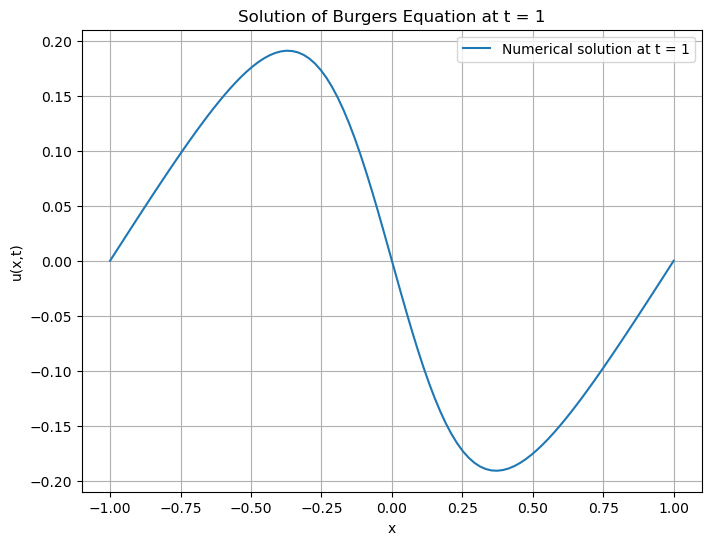

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0              # Length of the domain
T = 1              # Total time
nu = 0.1/np.pi            # Viscosity (diffusion coefficient)
Nx = 100             # Number of spatial points
Nt = 5000            # Number of time steps
dx = L / (Nx - 1)    # Spatial step size
dt = T / Nt          # Time step size

# Create spatial and temporal grids
x = np.linspace(-1, L, Nx)
t = np.linspace(0, T, Nt)

# Initial condition: u(x,0) = sin(pi * x)
u = -np.sin(np.pi * x)

# Initialize an array to store the solution at the next time step
u_new = np.zeros(Nx)

# Time-stepping loop
for n in range(1, Nt):
    u_new[0] = 0.0  # Boundary condition at x=0
    u_new[-1] = 0.0 # Boundary condition at x=1
    
    # Update the solution at interior points using finite difference scheme
    for i in range(1, Nx-1):
        u_new[i] = (
            u[i]
            - dt / (2 * dx) * u[i] * (u[i+1] - u[i-1])    # Convection term
            + nu * dt / (dx**2) * (u[i+1] - 2 * u[i] + u[i-1])  # Diffusion term
        )

    # Update the solution for the next time step
    u = u_new.copy()

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(x, u, label=f'Numerical solution at t = {T}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title(f'Solution of Burgers Equation at t = {T}')
plt.legend()
plt.grid(True)
plt.show()
